# DOE の集計

In [42]:
import sys

path_up = ".."
if not path_up in sys.path:
    sys.path.append(path_up)

In [43]:
import glob
import os

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from funcs.common import get_date_str_from_report
from structs.res import AppRes

In [44]:
res = AppRes()
list_csv = glob.glob(os.path.join("..", res.dir_report, "*", "report_*.csv"))
csv = list_csv[-1]
print(csv)

../report/2025-06-24/report_2025-06-24.csv


In [45]:
path_dir = os.path.dirname(csv)
print(f"path_dir = {path_dir}")
date_str = get_date_str_from_report(csv)
print(f"date_str = {date_str}")

path_dir = ../report/2025-06-24
date_str = 2025-06-24


In [46]:
df = pd.read_csv(csv)
df["銘柄コード"].astype(str)
df = df.astype({"銘柄コード": str})
df.map(type)

,日付,銘柄コード,移動メディアン数,加速因数,多数決数,損益
0,<class 'str'>,<class 'str'>,<class 'int'>,<class 'float'>,<class 'int'>,<class 'int'>
1,<class 'str'>,<class 'str'>,<class 'int'>,<class 'float'>,<class 'int'>,<class 'int'>
2,<class 'str'>,<class 'str'>,<class 'int'>,<class 'float'>,<class 'int'>,<class 'int'>
3,<class 'str'>,<class 'str'>,<class 'int'>,<class 'float'>,<class 'int'>,<class 'int'>
4,<class 'str'>,<class 'str'>,<class 'int'>,<class 'float'>,<class 'int'>,<class 'int'>
...,...,...,...,...,...,...
1255,<class 'str'>,<class 'str'>,<class 'int'>,<class 'float'>,<class 'int'>,<class 'int'>
1256,<class 'str'>,<class 'str'>,<class 'int'>,<class 'float'>,<class 'int'>,<class 'int'>
1257,<class 'str'>,<class 'str'>,<class 'int'>,<class 'float'>,<class 'int'>,<class 'int'>
1258,<class 'str'>,<class 'str'>,<class 'int'>,<class 'float'>,<class 'int'>,<class 'int'>


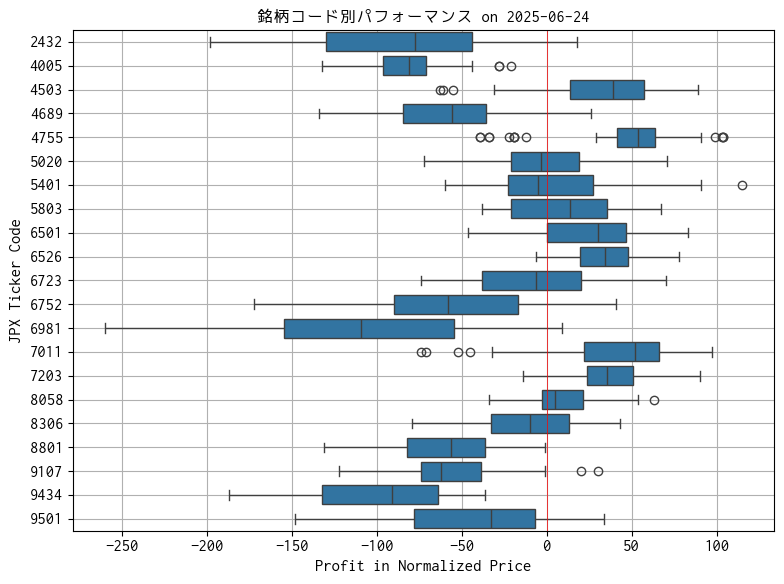

In [47]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams["font.family"] = font_prop.get_name()
plt.rcParams["font.size"] = 12

fig, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(data=df, x="損益", y="銘柄コード", ax=ax)
ax.axvline(0, color="red", linewidth=0.5)
ax.set_xlabel("Profit in Normalized Price")
ax.set_ylabel("JPX Ticker Code")
ax.grid()
ax.set_title(f"銘柄コード別パフォーマンス on {date_str}", fontsize=12)

plt.tight_layout()
plt.savefig(os.path.join(path_dir, f"{date_str}_performance_overall.png"))
plt.show()

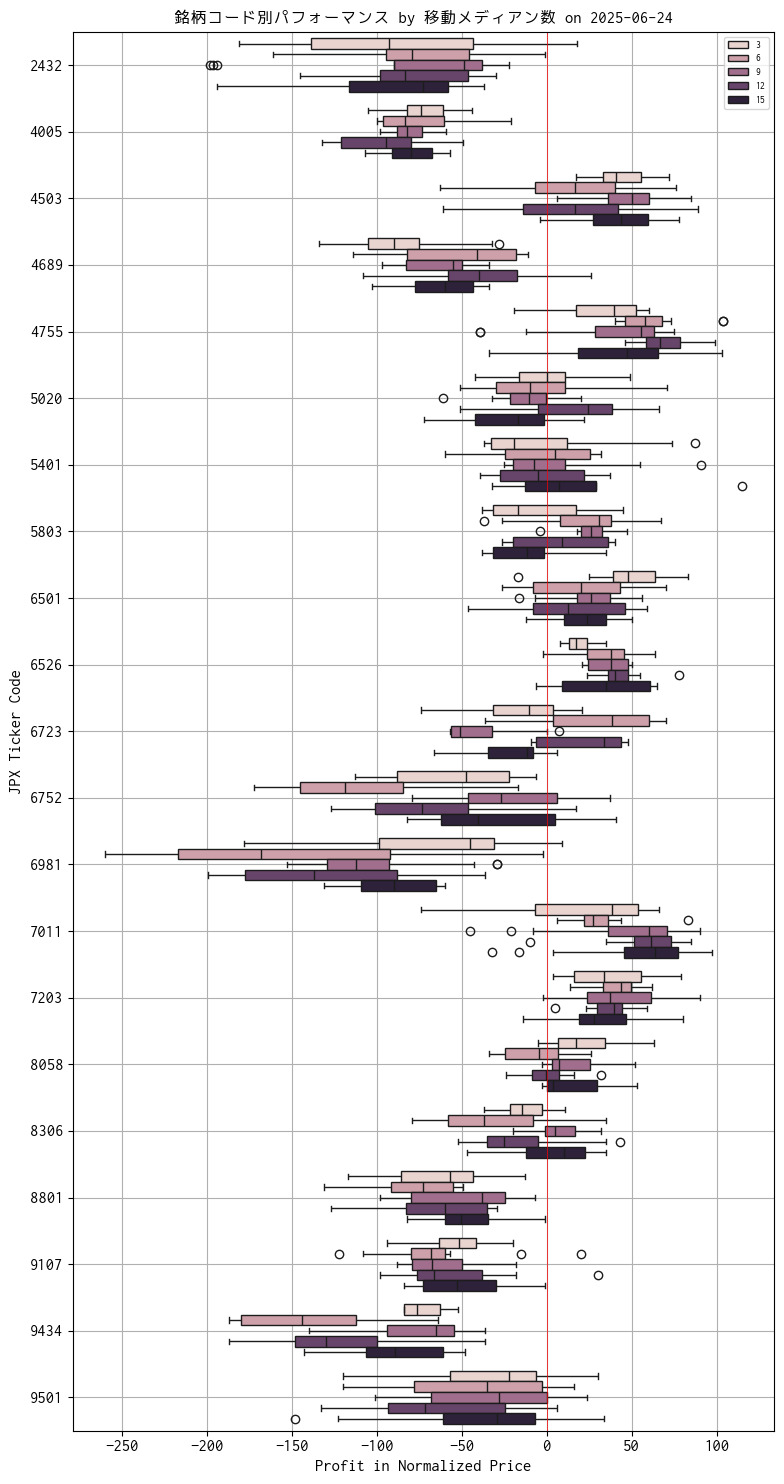

In [48]:
fig, ax = plt.subplots(figsize=(8, 15))

sns.boxplot(data=df, x="損益", y="銘柄コード", hue="移動メディアン数", ax=ax)
ax.axvline(0, color="red", linewidth=0.5)
ax.set_xlabel("Profit in Normalized Price")
ax.set_ylabel("JPX Ticker Code")
ax.grid()
ax.legend(fontsize=7)
ax.set_title(
    f"銘柄コード別パフォーマンス by 移動メディアン数 on {date_str}", fontsize=12
)

plt.tight_layout()
plt.savefig(os.path.join(path_dir, f"{date_str}_performance_by_moving_average.png"))
plt.show()

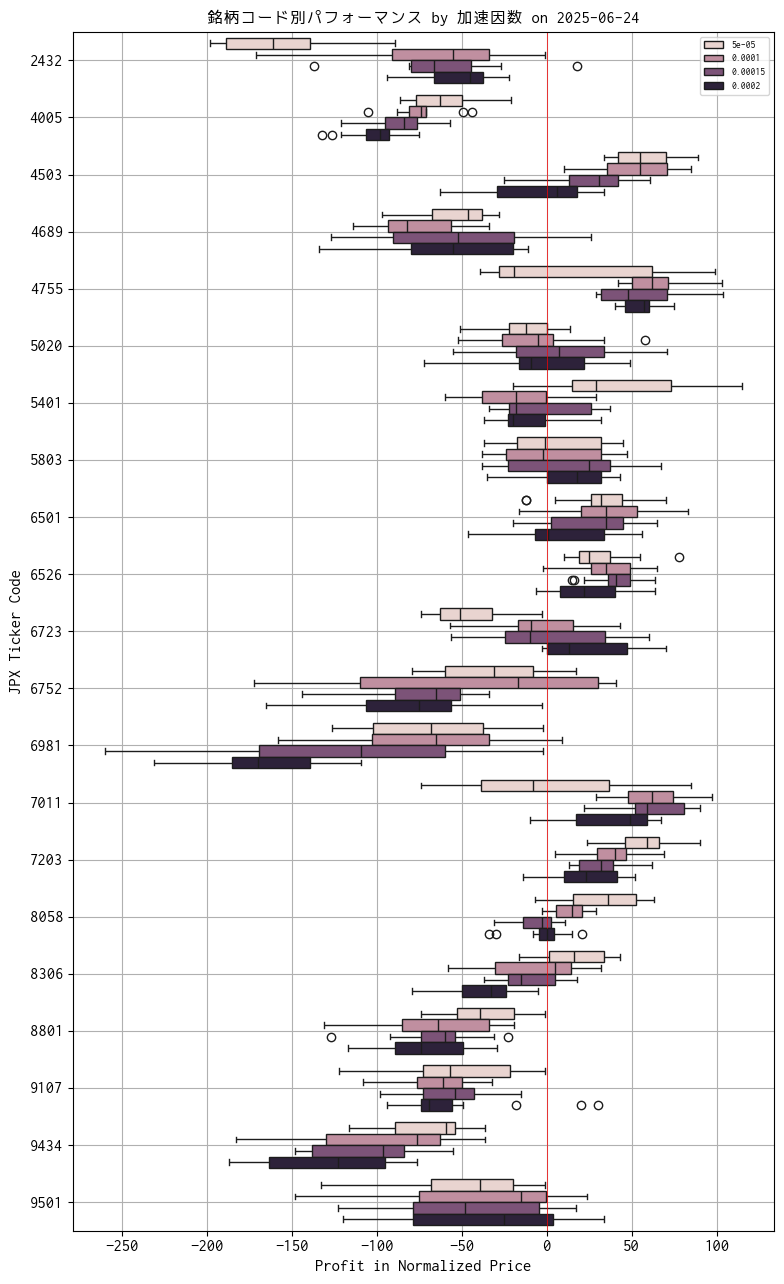

In [49]:
fig, ax = plt.subplots(figsize=(8, 13))

sns.boxplot(data=df, x="損益", y="銘柄コード", hue="加速因数", ax=ax)
ax.axvline(0, color="red", linewidth=0.5)
ax.set_xlabel("Profit in Normalized Price")
ax.set_ylabel("JPX Ticker Code")
ax.grid()
ax.legend(fontsize=7)
ax.set_title(f"銘柄コード別パフォーマンス by 加速因数 on {date_str}", fontsize=12)

plt.tight_layout()
plt.savefig(os.path.join(path_dir, f"{date_str}_performance_by_af.png"))
plt.show()

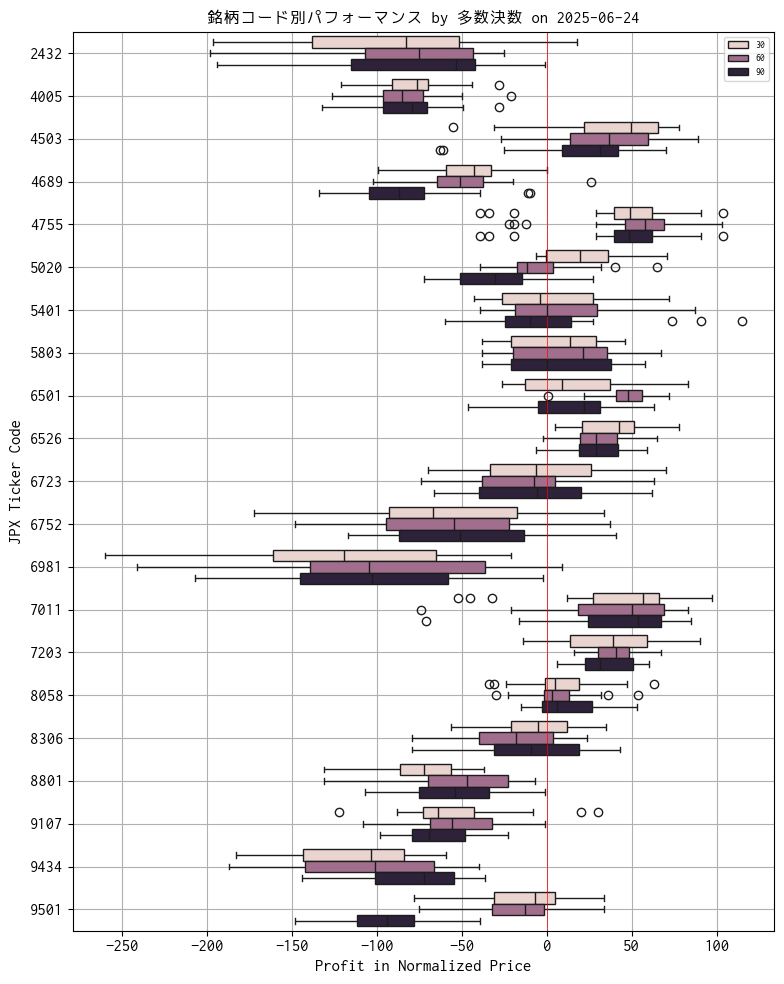

In [50]:
fig, ax = plt.subplots(figsize=(8, 10))

sns.boxplot(data=df, x="損益", y="銘柄コード", hue="多数決数", ax=ax)
ax.axvline(0, color="red", linewidth=0.5)
ax.set_xlabel("Profit in Normalized Price")
ax.set_ylabel("JPX Ticker Code")
ax.grid()
ax.legend(fontsize=7)
ax.set_title(f"銘柄コード別パフォーマンス by 多数決数 on {date_str}", fontsize=12)

plt.tight_layout()
plt.savefig(os.path.join(path_dir, f"{date_str}_performance_by_majority_vote.png"))
plt.show()